## Evaluating Obesity, Smoking and Myocardial Infarction Rates in Germany: A Retrospective Analysis for SDG 3 

##### **Introduction**

Key tenets of the [Sustainable Development Goals (SDGs)](https://www.un.org/sustainabledevelopment/health/) by 2030 include ensuring optimal health and preventing deaths from non-communicable diseases; cardiovascular diseases are the leading cause of these deaths. The global implementation of tobacco control is also a critical focus.

In this project, I will analyse the most recent data (2021) from the German Federal Statistical Office ([*Statistisches Bundesamt*](https://www.destatis.de/EN/)) to assess Germany's progress towards the aforementioned goals. Additionally, the project will also explore the influence of obesity and smoking on the prevalence of myocardial infarction across Germany's 16 federal states.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import io
import json
import geopandas as gpd
import pingouin as pg
import PIL
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
pio.renderers.default = 'png'

To ensure the plots are interactive, run

 `pio.renderers.default = 'iframe'`

In [3]:
ami = "./dataset/AMI.csv"
smoke = "./dataset/smoke_data.csv"
obese = "./dataset/obese_data.csv"
deu = './dataset/state_borders.geojson'

In [4]:
# Loading datasets
df_ami = pd.read_csv(ami)
df_smoke = pd.read_csv(smoke)
df_obese = pd.read_csv(obese)
geo_df = gpd.read_file(deu)

**Previewing the Dataframes**

In [5]:
geo_df.head()

,id,name,type,geometry
0,DE-BW,Baden-Württemberg,State,"MULTIPOLYGON (((9.65046 49.77634, 9.63747 49.6..."
1,DE-BY,Bayern,State,"POLYGON ((10.13386 50.55, 10.20432 50.5538, 10..."
2,DE-BE,Berlin,State,"POLYGON ((13.16181 52.59442, 13.21621 52.58252..."
3,DE-BB,Brandenburg,State,"POLYGON ((13.87951 53.50107, 13.91737 53.42054..."
4,DE-HB,Bremen,State,"POLYGON ((8.98545 53.12822, 8.94874 53.1238, 8..."


In [6]:
df_ami.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Germany,362.35,328.04,336.33,376.38,390.21,372.07,367.71,366.21,351.67,...,348.28,347.84,346.25,342.88,333.90,330.35,312.14,307.98,303.50,NaN
1,Baden-Wurttemberg,296.03,260.23,274.15,312.38,337.99,325.74,319.14,316.16,314.84,...,324.57,330.12,333.44,328.88,327.72,333.84,306.38,296.19,298.72,NaN
2,Bavaria,276.94,279.33,287.83,341.53,371.34,342.98,341.41,331.16,318.97,...,315.83,311.03,317.96,317.36,313.62,310.21,286.74,277.90,276.53,NaN
3,Berlin,319.70,304.98,306.90,315.57,336.16,341.62,316.85,330.25,326.42,...,299.38,314.01,304.31,304.44,301.46,293.03,301.11,286.98,289.59,NaN
4,Brandenburg,391.99,371.69,401.29,428.77,437.47,436.09,411.98,413.93,370.82,...,349.30,350.29,356.39,364.37,328.20,327.91,317.85,318.43,302.84,NaN


In [7]:
df_obese.head()

,Unnamed: 0,2005,2009,2013,2017,20211)
0,Baden-Württemberg,12.2,13.3,14.132010,14.857789,15.138703
1,Bayern,12.9,14.0,14.839800,15.188695,15.326701
2,Berlin,12.1,12.2,12.977208,13.021415,13.781481
3,Brandenburg,15.6,17.3,17.909189,18.275427,18.205097
4,Bremen,10.7,12.8,14.645309,17.800536,17.335167


In [8]:
df_smoke.head()

,Unnamed: 0,2003,2005,2009,2013,2017,20211)
0,Baden-Württemberg,25.5,24.545573,22.761149,22.209077,21.227831,17.351354
1,Bayern,25.2,24.260753,23.490198,22.148263,20.510728,17.023511
2,Berlin,38.8,32.734531,31.340602,28.852430,25.466611,21.387527
3,Brandenburg,30.4,29.008016,27.953676,25.765941,24.471126,19.177787
4,Bremen,33.9,30.788804,30.482997,27.766644,27.388535,22.719054


In [9]:
df_ami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   17 non-null     object 
 1   2000    17 non-null     float64
 2   2001    17 non-null     float64
 3   2002    17 non-null     float64
 4   2003    17 non-null     float64
 5   2004    17 non-null     float64
 6   2005    17 non-null     float64
 7   2006    17 non-null     float64
 8   2007    17 non-null     float64
 9   2008    17 non-null     float64
 10  2009    17 non-null     float64
 11  2010    17 non-null     float64
 12  2011    17 non-null     float64
 13  2012    17 non-null     float64
 14  2013    17 non-null     float64
 15  2014    17 non-null     float64
 16  2015    17 non-null     float64
 17  2016    17 non-null     float64
 18  2017    17 non-null     float64
 19  2018    17 non-null     float64
 20  2019    17 non-null     float64
 21  2020    17 non-null     float64
 22  2021

In [10]:
df_obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     object 
 1   2005        16 non-null     float64
 2   2009        16 non-null     float64
 3   2013        16 non-null     float64
 4   2017        16 non-null     float64
 5   20211)      16 non-null     float64
dtypes: float64(5), object(1)
memory usage: 900.0+ bytes


In [11]:
df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     object 
 1   2003        16 non-null     float64
 2   2005        16 non-null     float64
 3   2009        16 non-null     float64
 4   2013        16 non-null     float64
 5   2017        16 non-null     float64
 6   20211)      16 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.0+ KB


In [12]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        16 non-null     object  
 1   name      16 non-null     object  
 2   type      16 non-null     object  
 3   geometry  16 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 644.0+ bytes


### Part I: Data Preparation

In [13]:
# Removing Germany from `df_ami`
df_ami.drop(0, axis=0, inplace=True)

# Dropping the empty column '2023' 
df_ami.drop('2023', axis=1, inplace=True)

In [14]:
# Renaming columns in `df_obese` & `df_smoke`
df_obese.rename(columns={'Unnamed: 0' : 'State', '20211)': '2021'}, inplace=True)
df_smoke.rename(columns={'Unnamed: 0' : 'State', '20211)': '2021'}, inplace=True)

In [15]:
# Renaming 'name' in `geo_df`
geo_df.rename(columns={'name':'State'}, inplace=True)

# Dropping 'type' in `geo_df`
geo_df.drop('type', axis=1, inplace=True)

**Creating a dictionary for state name to ensure homogeneity**
* All German names will be translated to their English versions

In [16]:
df_ami['State'].unique()

array(['Baden-Wurttemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hesse', 'Mecklenburg Western Pomerania',
       'Lower Saxony', 'North Rhine-Westphalia', 'Rhineland-Palatinate',
       'Saarland', 'Saxony', 'Saxony Anhalt', 'Schleswig-Holstein',
       'Thuringia'], dtype=object)

In [17]:
df_obese['State'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [18]:
df_smoke['State'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [19]:
geo_df['State'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland',
       'Sachsen-Anhalt', 'Sachsen', 'Schleswig-Holstein', 'Thüringen'],
      dtype=object)

In [20]:
ENG = df_ami['State'].unique()
GER = df_obese['State'].unique()
state_dict = dict(zip(GER,ENG))

In [21]:
state_dict

{'Baden-Württemberg': 'Baden-Wurttemberg',
 'Bayern': 'Bavaria',
 'Berlin': 'Berlin',
 'Brandenburg': 'Brandenburg',
 'Bremen': 'Bremen',
 'Hamburg': 'Hamburg',
 'Hessen': 'Hesse',
 'Mecklenburg-Vorpommern': 'Mecklenburg Western Pomerania',
 'Niedersachsen': 'Lower Saxony',
 'Nordrhein-Westfalen': 'North Rhine-Westphalia',
 'Rheinland-Pfalz': 'Rhineland-Palatinate',
 'Saarland': 'Saarland',
 'Sachsen': 'Saxony',
 'Sachsen-Anhalt': 'Saxony Anhalt',
 'Schleswig-Holstein': 'Schleswig-Holstein',
 'Thüringen': 'Thuringia'}

In [22]:
# Replacing all the German states with their English versions
dfs = [df_smoke, df_obese, geo_df]

for df in dfs:
    df['State'] = df['State'].replace(state_dict)

**Creating a dataframe containing health indices for the year 2021**

In [23]:
df1 = pd.merge(df_smoke[['State', '2021']], df_obese[['State','2021']], on = 'State', suffixes=('_Smoking(%)', '_Obese(%)'))
final_df = pd.merge(df1, df_ami[['State','2021']], on = 'State')

In [24]:
final_df.rename(columns={'2021':'2021_MI(per_100k)'}, inplace=True)

In [25]:
final_df.head()

,State,2021_Smoking(%),2021_Obese(%),2021_MI(per_100k)
0,Baden-Wurttemberg,17.351354,15.138703,296.19
1,Bavaria,17.023511,15.326701,277.90
2,Berlin,21.387527,13.781481,286.98
3,Brandenburg,19.177787,18.205097,318.43
4,Bremen,22.719054,17.335167,375.33


**Processing the GeoDataFrame `geo_df` for accurate mapping**

In [26]:
# Setting the Coordinate Reference System (CRS) to WGS 84
geo_df.set_crs(epsg=4326, inplace=True)

# Converting the geographic CRS to a projected CRS (Web Mercator)
geo_projected = geo_df.to_crs(epsg=3857)

# Extracting the centroids from the projected CRS
geo_projected['centroid'] = geo_projected.centroid

# Converting the projected CRS back to geographic CRS
geo_df['centroid'] = geo_projected['centroid'].to_crs(epsg=4326)

# Extracting the latitudes & longitudes
geo_df['cen_lat'] = geo_df['centroid'].y
geo_df['cen_lon'] = geo_df['centroid'].x

In [27]:
geo_df

,id,State,geometry,centroid,cen_lat,cen_lon
0,DE-BW,Baden-Wurttemberg,"MULTIPOLYGON (((9.65046 49.77634, 9.63747 49.6...",POINT (9.05234 48.55631),48.556313,9.052336
1,DE-BY,Bavaria,"POLYGON ((10.13386 50.55, 10.20432 50.5538, 10...",POINT (11.41812 48.96829),48.968295,11.418117
2,DE-BE,Berlin,"POLYGON ((13.16181 52.59442, 13.21621 52.58252...",POINT (13.40772 52.49949),52.499490,13.407722
3,DE-BB,Brandenburg,"POLYGON ((13.87951 53.50107, 13.91737 53.42054...",POINT (13.39671 52.48168),52.481677,13.396714
4,DE-HB,Bremen,"POLYGON ((8.98545 53.12822, 8.94874 53.1238, 8...",POINT (8.80077 53.11023),53.110230,8.800768
5,DE-HH,Hamburg,"POLYGON ((10.07162 53.71823, 10.19855 53.74079...",POINT (10.02436 53.55212),53.552118,10.024356
6,DE-HE,Hesse,"POLYGON ((9.49877 51.63152, 9.62798 51.63734, ...",POINT (9.04179 50.61081),50.610806,9.041792
7,DE-MV,Mecklenburg Western Pomerania,"MULTIPOLYGON (((12.51972 54.48431, 12.65528 54...",POINT (12.53838 53.7552),53.755201,12.538383
8,DE-NI,Lower Saxony,"MULTIPOLYGON (((8.68083 53.89208, 8.75695 53.8...",POINT (9.17163 52.77989),52.779885,9.171627
9,DE-NW,North Rhine-Westphalia,"POLYGON ((8.66628 52.52528, 8.70401 52.5036, 8...",POINT (7.56922 51.4854),51.485397,7.569221


In [28]:
# Dropping the centroid column to avoid issues when converting GeoDataFrame to GeoJSON
geo_df.drop('centroid', axis=1, inplace=True)

In [29]:
# Converting the geopandas dataframe to geojson
geo_str = geo_df.to_json()
geojsn_data = json.loads(geo_str)

### Part II: Data Visualization

* In this section, I will provide important plots to highlight insights on the data.

##### Mapping Myocardial Infarction Rates by Federal State in 2021

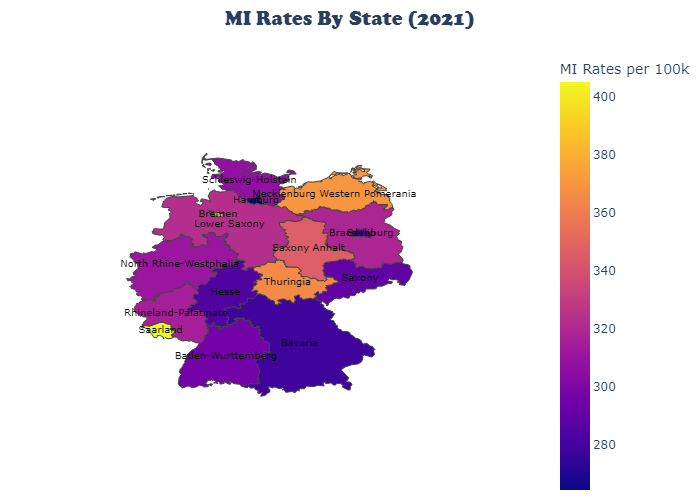

In [31]:
karte = px.choropleth(final_df, geojson= geojsn_data, featureidkey= 'properties.State', 
                      locations = 'State' , hover_name = 'State', 
                      hover_data= {'2021_Smoking(%)':':.2f', '2021_Obese(%)': ':.2f'}, 
                      color = '2021_MI(per_100k)', 
                      labels={'2021_MI(per_100k)':'MI Rates per 100k', 
                              '2021_Smoking(%)':'Smoking Rate(%)',
                              '2021_Obese(%)':'Obesity Rate(%)'},
                      )

# Setting plot margins and title
karte.update_layout(title={'text':'MI Rates By State (2021)', 'x':0.5},
                    title_font={'family':'Cooper Black', 'size':20},
                    margin = {'r':0, 'l':0, 't':50, 'b':0},
                    )

karte.update_geos(fitbounds = 'locations', visible = False)

# To add state names to the plot
karte.add_trace(go.Scattergeo(
    lon = geo_df['cen_lon'],
    lat = geo_df['cen_lat'],
    text = geo_df['State'],
    mode = 'text',
    textfont = dict(size=10, color='black'),
    showlegend = False
))

karte.show()

#Saving the image
# karte.write_image('mir_2021.png')

##### What Were the Best and Worst Performing States in Terms of Obesity & Smoking Rates?

In [32]:
smoke_ranked = final_df.sort_values(by='2021_Smoking(%)', ascending=False)
obese_ranked = final_df.sort_values(by='2021_Obese(%)', ascending=False)
mi_ranked = final_df.sort_values(by='2021_MI(per_100k)', ascending=False)

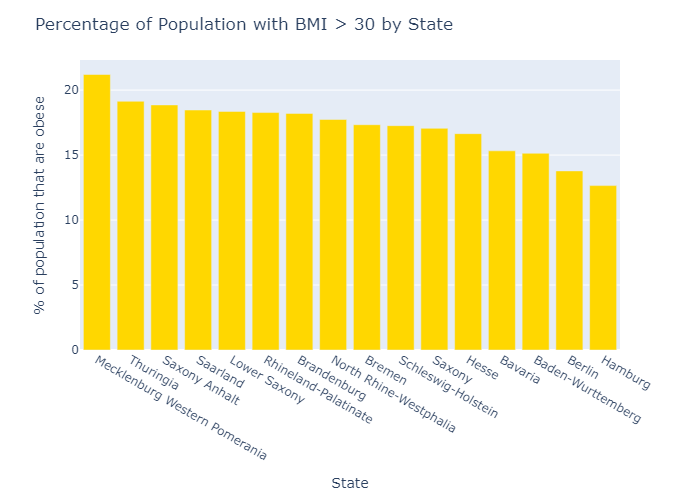

In [34]:
fig = px.bar(x='State', y='2021_Obese(%)', color_discrete_sequence = ['gold'], data_frame = obese_ranked)

fig.update_layout(title='Percentage of Population with BMI > 30 by State', yaxis_title = '% of population that are obese')

fig.update_xaxes(tickangle=45)

#fig.write_image('BMI_state.png')

Top 3 States with the **Healthiest BMI (Lowest Obesity Rates)**
* Hamburg (12.6%)
* Berlin (13.8%)
* Baden-Wurttemberg (15.1%)


Bottom 3 States with the **Worst BMI (Highest Obesity Rates)**
* Mecklenburg Western Pomerania (21.2%)
* Thuringia (19.1%)
* Saxony Anhalt (18.9%)


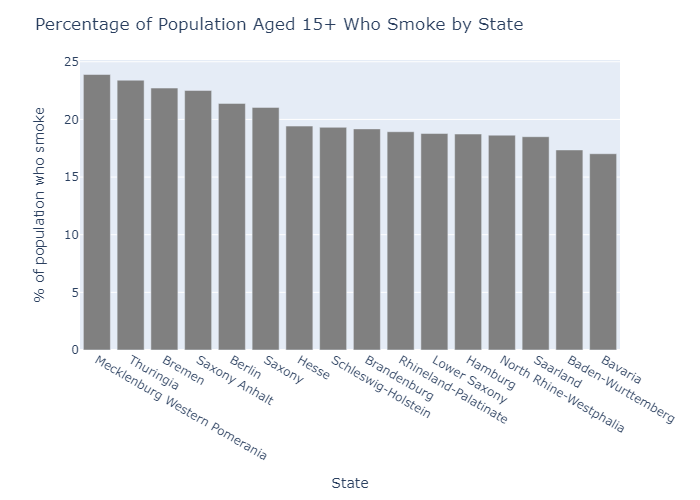

In [35]:
fig = px.bar(x='State', y='2021_Smoking(%)', color_discrete_sequence = ['gray'], data_frame = smoke_ranked)

fig.update_layout(title='Percentage of Population Aged 15+ Who Smoke by State', yaxis_title = '% of population who smoke')

fig.update_xaxes(tickangle=45)

# fig.write_image('smoking_by_state.png')

Top 3 States with the **Lowest Proportion of Smokers^*^**
* Bavaria (17.0%)
* Baden-Wurttemberg (17.4%)
* Saarland (18.5%)

Bottom 3 States with the **Highest Proportion of Smokers^*^**
* Mecklenburg Western Pomerania (23.9%)
* Thuringia (23.4%)
* Bremen (22.7%)

_*_ : *Includes individuals who smoke occasionally*

##### Worst-Hit States by MI Attack Rates (case count per 100,000 people)

* Saarland (405.2)
* Bremen (375.3)
* Mecklenburg Western Pomerania	(370.4)

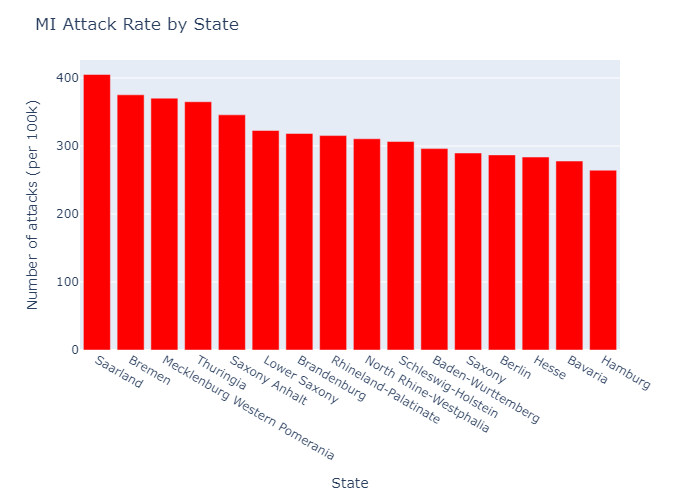

In [36]:
fig = px.bar(x='State', y='2021_MI(per_100k)', color_discrete_sequence = ['red'], data_frame = mi_ranked)

fig.update_layout(title='MI Attack Rate by State', yaxis_title = 'Number of attacks (per 100k)')

fig.update_xaxes(tickangle=45)

#fig.write_image('MI_by_state.png')

##### Visualizing Trends in **Myocardial Infarction Rates** across Germany (2010-2022)

In [37]:
df_ami.head()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Baden-Wurttemberg,296.03,260.23,274.15,312.38,337.99,325.74,319.14,316.16,314.84,...,326.01,324.57,330.12,333.44,328.88,327.72,333.84,306.38,296.19,298.72
2,Bavaria,276.94,279.33,287.83,341.53,371.34,342.98,341.41,331.16,318.97,...,322.72,315.83,311.03,317.96,317.36,313.62,310.21,286.74,277.90,276.53
3,Berlin,319.70,304.98,306.90,315.57,336.16,341.62,316.85,330.25,326.42,...,317.03,299.38,314.01,304.31,304.44,301.46,293.03,301.11,286.98,289.59
4,Brandenburg,391.99,371.69,401.29,428.77,437.47,436.09,411.98,413.93,370.82,...,341.91,349.30,350.29,356.39,364.37,328.20,327.91,317.85,318.43,302.84
5,Bremen,413.03,407.30,388.40,437.99,446.92,457.16,442.06,443.03,397.56,...,400.09,393.01,380.53,394.39,384.41,340.93,343.39,346.05,375.33,359.82


In [38]:
# Subsetting `df_ami` to data from 2010 onwards
ami_2010s = df_ami.loc[:,"2010":]
ami_2010s.insert(0, 'State', df_ami['State'])

In [39]:
# Melting `amis_2010s`
ami_2010s_long = ami_2010s.melt(id_vars='State', var_name='Year', value_name='AMI_Rate')

# Parsing the 'Year' column to datetime
ami_2010s_long['Year'] = pd.to_datetime(ami_2010s_long['Year'], format='%Y')

In [40]:
ami_2010s_long.head()

,State,Year,AMI_Rate
0,Baden-Wurttemberg,2010-01-01,307.75
1,Bavaria,2010-01-01,314.85
2,Berlin,2010-01-01,313.01
3,Brandenburg,2010-01-01,365.31
4,Bremen,2010-01-01,425.59


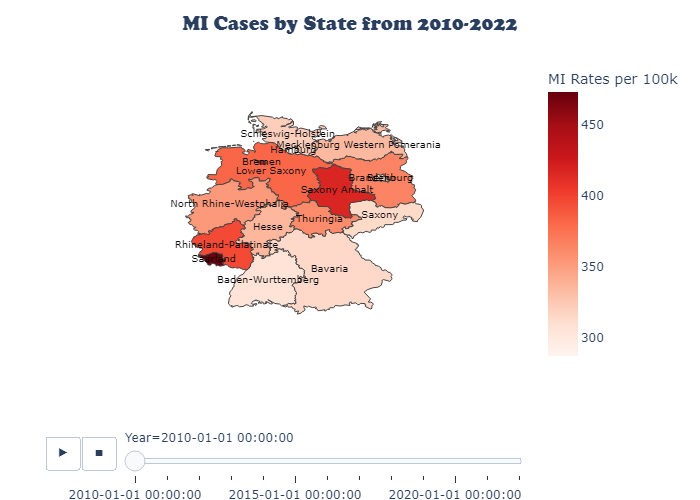

In [41]:
ami_trend = px.choropleth(ami_2010s_long, geojson= geojsn_data, featureidkey= 'properties.State', 
                      locations = 'State' , hover_name = 'State', 
                      hover_data= {'AMI_Rate':':.2f'}, 
                      color = 'AMI_Rate', 
                      labels={'AMI_Rate':'MI Rates per 100k'},
                      animation_frame = 'Year',
                      color_continuous_scale = 'Reds'
                      )


ami_trend.update_geos(fitbounds = 'locations', visible = False)

ami_trend.add_trace(go.Scattergeo(
    lon = geo_df['cen_lon'],
    lat = geo_df['cen_lat'],
    text = geo_df['State'],
    mode = 'text',
    textfont = dict(size=10, color='black'),
    showlegend = False
))

ami_trend.update_layout(title={'text':'MI Cases by State from 2010-2022', 'x':0.5},
                         title_font={'family':'Cooper Black', 'size':20},
                         sliders=[{'pad':{'b': -10}}],
                        updatemenus = [{'buttons': [{'args':[None, {'frame': {'duration':1000}}]}]}]
                        )


ami_trend.show()

In [42]:
# Saving the animated plot above to gif

frames = []

for s, fr in enumerate(ami_trend.frames):
    finals = list(fr.data) + [trace for trace in ami_trend.data if isinstance(trace, go.Scattergeo)]
    ami_trend.update(data=finals)
    ami_trend.layout.sliders[0].update(active = s)
    frames.append(PIL.Image.open(io.BytesIO(ami_trend.to_image(format='png'))))

# frames[0].save('./images/ami_map_trend.gif', save_all=True, append_images=frames[1:], optimize=True, duration=1000, loop=3)


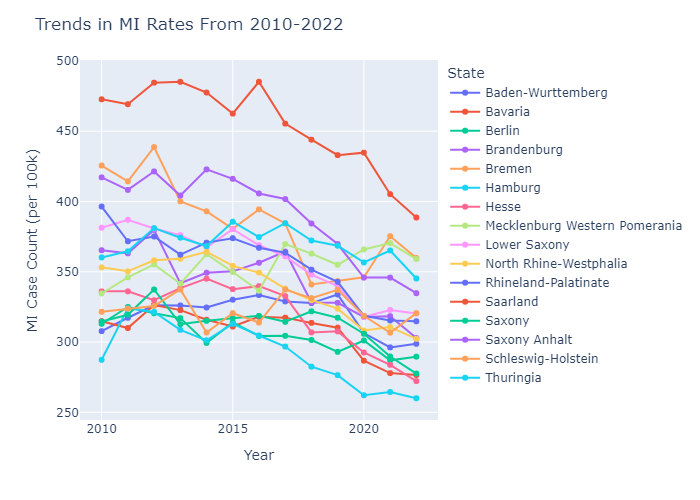

In [43]:
fig = px.line(x='Year', y = 'AMI_Rate', color='State', data_frame=ami_2010s_long, markers=True)

fig.update_layout(title='Trends in MI Rates From 2010-2022', yaxis_title='MI Case Count (per 100k)')

#fig.write_image('MI_trend.png')

##### Visualizing Trends in **Obesity Rates** across Germany (2009-2021)

In [44]:
df_obese.head()

,State,2005,2009,2013,2017,2021
0,Baden-Wurttemberg,12.2,13.3,14.132010,14.857789,15.138703
1,Bavaria,12.9,14.0,14.839800,15.188695,15.326701
2,Berlin,12.1,12.2,12.977208,13.021415,13.781481
3,Brandenburg,15.6,17.3,17.909189,18.275427,18.205097
4,Bremen,10.7,12.8,14.645309,17.800536,17.335167


In [45]:
df_obese.columns

Index(['State', '2005', '2009', '2013', '2017', '2021'], dtype='object')

In [46]:
# Converting all the column names to strings
df_obese.columns = df_obese.columns.astype('str')

In [47]:
# Subsetting and melting `df_obese`
df_obese_2009s = df_obese.drop('2005', axis=1)
df_obese_long = df_obese_2009s.melt(id_vars='State', var_name='Year', value_name='Obesity_Rate')

# Parsing the 'Year' column to datetime
df_obese_long['Year'] = pd.to_datetime(df_obese_long['Year'], format='%Y')

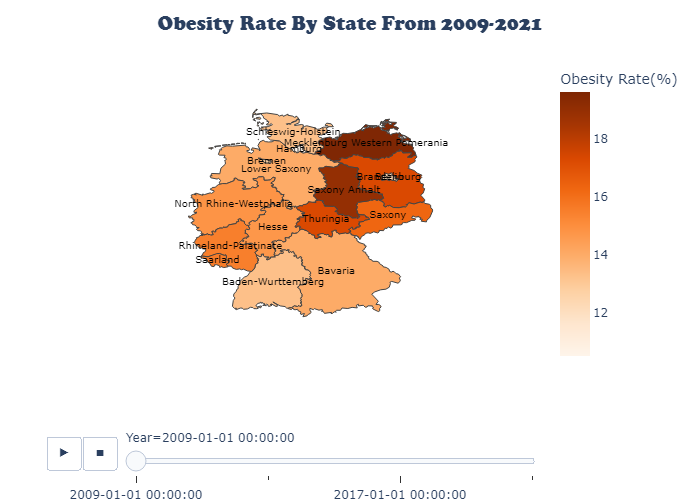

In [48]:
obese_trend = px.choropleth(df_obese_long, geojson= geojsn_data, featureidkey= 'properties.State', 
                      locations = 'State' , hover_name = 'State', 
                      hover_data= {'Obesity_Rate':':.2f'}, 
                      color = 'Obesity_Rate', 
                      labels={'Obesity_Rate':'Obesity Rate(%)'},
                      animation_frame = 'Year',
                      color_continuous_scale = 'Oranges'
                      )


obese_trend.update_geos(fitbounds = 'locations', visible = False)

obese_trend.add_trace(go.Scattergeo(
    lon = geo_df['cen_lon'],
    lat = geo_df['cen_lat'],
    text = geo_df['State'],
    mode = 'text',
    textfont = dict(size=10, color='black'),
    showlegend = False
))

obese_trend.update_layout(title={'text':'Obesity Rate By State From 2009-2021', 'x':0.5},
                         title_font={'family':'Cooper Black', 'size':20},
                         sliders=[{'pad':{'b': -10}}],
                        updatemenus = [{'buttons': [{'args':[None, {'frame': {'duration':1000}}]}]}]
                        )

obese_trend.show()

In [49]:
# Saving the animated plot above to gif

frames = []

for s, fr in enumerate(obese_trend.frames):
    finals = list(fr.data) + [trace for trace in obese_trend.data if isinstance(trace, go.Scattergeo)]
    obese_trend.update(data=finals)
    obese_trend.layout.sliders[0].update(active = s)
    frames.append(PIL.Image.open(io.BytesIO(obese_trend.to_image(format='png'))))

# frames[0].save('./images/obese_map_trend.gif', save_all=True, append_images=frames[1:], optimize=True, duration=1000, loop=3)


**Percentage change in obesity rate from 2017 - 2021**

In [50]:
df_obese_2009s['per_change'] = ((df_obese_2009s['2021'] - df_obese_2009s['2017']) / df_obese_2009s['2017'] * 100)

In [51]:
# Showing top 3 states with the largest increase in obesity rate
df_obese_2009s.sort_values(by='per_change', ascending=False).head(3).reset_index(drop=True)

,State,2009,2013,2017,2021,per_change
0,Saarland,15.6,15.968940,16.250000,18.466836,13.642067
1,Schleswig-Holstein,13.3,14.396265,15.376142,17.263885,12.277093
2,Lower Saxony,14.0,15.531491,16.577843,18.361087,10.756794


In [52]:
# Showing top 3 states with the largest decrease in obesity rate
df_obese_2009s.sort_values(by='per_change', ascending=True).head(3).reset_index(drop=True)

,State,2009,2013,2017,2021,per_change
0,Saxony Anhalt,19.0,20.196440,20.771448,18.858843,-9.207855
1,Thuringia,17.3,18.127894,20.447333,19.139401,-6.396587
2,Saxony,16.3,16.847008,18.010692,17.057405,-5.292895


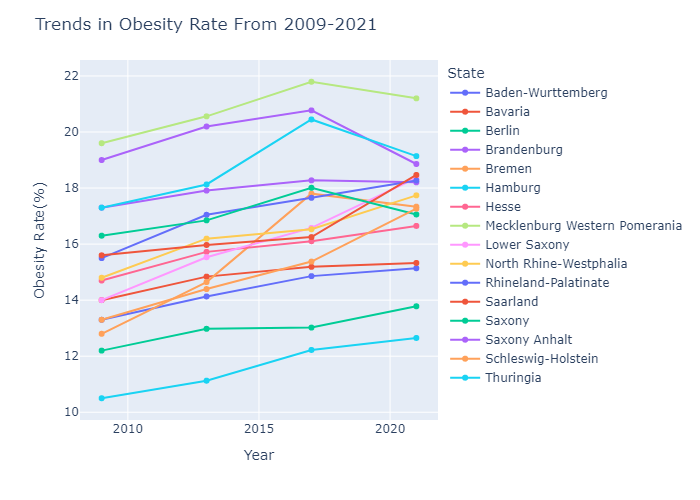

In [53]:
fig = px.line(x='Year', y = 'Obesity_Rate', color='State', data_frame=df_obese_long, markers=True)
fig.update_layout(title='Trends in Obesity Rate From 2009-2021', yaxis_title='Obesity Rate(%)')

# fig.write_image('obese_trend.png')

##### Visualizing Trends in **Smoking Rates** across Germany (2009-2021)

In [54]:
df_smoke.head()

,State,2003,2005,2009,2013,2017,2021
0,Baden-Wurttemberg,25.5,24.545573,22.761149,22.209077,21.227831,17.351354
1,Bavaria,25.2,24.260753,23.490198,22.148263,20.510728,17.023511
2,Berlin,38.8,32.734531,31.340602,28.852430,25.466611,21.387527
3,Brandenburg,30.4,29.008016,27.953676,25.765941,24.471126,19.177787
4,Bremen,33.9,30.788804,30.482997,27.766644,27.388535,22.719054


In [55]:
df_smoke.columns

Index(['State', '2003', '2005', '2009', '2013', '2017', '2021'], dtype='object')

In [56]:
# Converting all the column names to strings
df_smoke.columns = df_smoke.columns.astype('str')

In [57]:
# Subsetting and melting `df_smoke`
df_smoke_2009s = df_smoke.drop('2005', axis=1)
df_smoke_long = df_smoke_2009s.melt(id_vars='State', var_name='Year', value_name='Smoking_Rate')

# Parsing the 'Year' column to datetime
df_smoke_long['Year'] = pd.to_datetime(df_smoke_long['Year'], format='%Y')

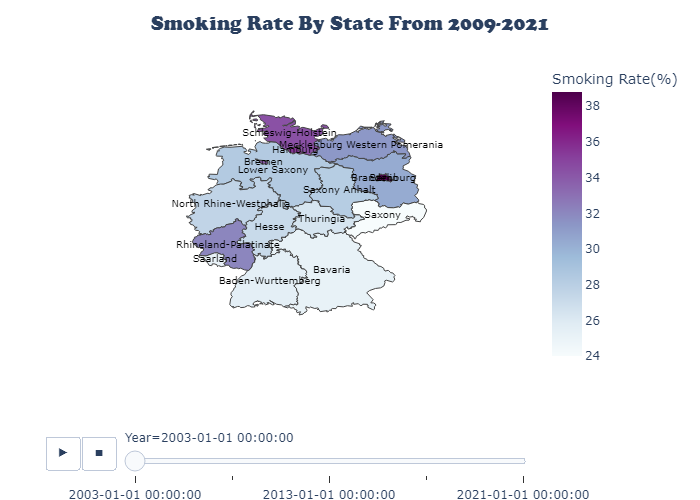

In [58]:
smoke_trend = px.choropleth(df_smoke_long, geojson= geojsn_data, featureidkey= 'properties.State', 
                      locations = 'State' , hover_name = 'State', 
                      hover_data= {'Smoking_Rate':':.2f'}, 
                      color = 'Smoking_Rate', 
                      labels={'Smoking_Rate':'Smoking Rate(%)'},
                      animation_frame = 'Year',
                      color_continuous_scale = 'BuPu'
                      )


smoke_trend.update_geos(fitbounds = 'locations', visible = False)

smoke_trend.add_trace(go.Scattergeo(
    lon = geo_df['cen_lon'],
    lat = geo_df['cen_lat'],
    text = geo_df['State'],
    mode = 'text',
    textfont = dict(size=10, color='black'),
    showlegend = False
))

smoke_trend.update_layout(title={'text':'Smoking Rate By State From 2009-2021', 'x':0.5},
                         title_font={'family':'Cooper Black', 'size':20},
                         sliders=[{'pad':{'b': -10}}],
                        updatemenus = [{'buttons': [{'args':[None, {'frame': {'duration':1000}}]}]}]
                        )

smoke_trend.show()

In [59]:
# Saving the animated plot above to gif

frames = []

for s, fr in enumerate(smoke_trend.frames):
    finals = list(fr.data) + [trace for trace in smoke_trend.data if isinstance(trace, go.Scattergeo)]
    smoke_trend.update(data=finals)
    smoke_trend.layout.sliders[0].update(active = s)
    frames.append(PIL.Image.open(io.BytesIO(smoke_trend.to_image(format='png'))))

# frames[0].save('./images/smoke_map_trend.gif', save_all=True, append_images=frames[1:], optimize=True, duration=1000, loop=3)

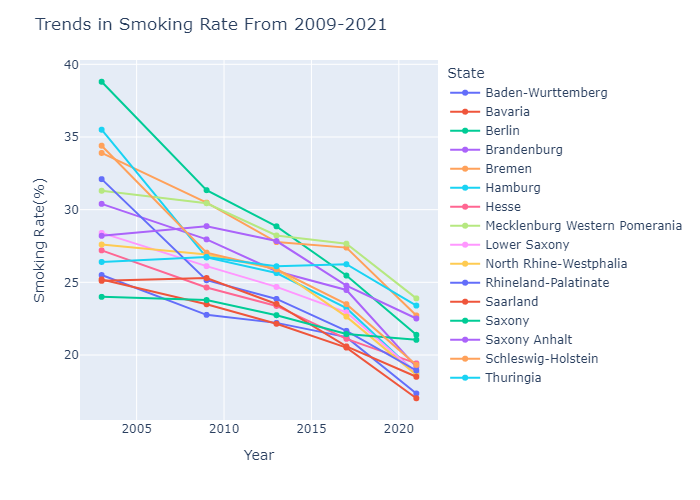

In [60]:
fig = px.line(x='Year', y = 'Smoking_Rate', color='State', data_frame=df_smoke_long, markers=True)
fig.update_layout(title='Trends in Smoking Rate From 2009-2021', yaxis_title='Smoking Rate(%)')

#fig.write_image('smoke_trend.png')

### Part III: Statistical Analysis
* In this section, I'll conduct statistical tests to assess the relationship between obesity, smoking and the prevalence of myocardial infarction.

##### Testing for normality in the distribution of obesity rates, smoking rates & MI attack rates across German states

In [61]:
# Shapiro-Wilk test for normal distribution in smoking rates across states
st.shapiro(final_df['2021_Smoking(%)'])

ShapiroResult(statistic=np.float64(0.9084969854722007), pvalue=np.float64(0.11005737225487222))

In [62]:
# Shapiro-Wilk test for normal distribution in obese rates across states
st.shapiro(final_df['2021_Obese(%)'])

ShapiroResult(statistic=np.float64(0.9511813607127537), pvalue=np.float64(0.5086316823083297))

In [63]:
# Shapiro-Wilk test for normal distribution in MI rates across states
st.shapiro(final_df['2021_MI(per_100k)'])

ShapiroResult(statistic=np.float64(0.9368747186513096), pvalue=np.float64(0.3124781047490307))

* From the above tests, the null hypothesis **fails to be rejected** indicating that the data follows a normal distribution.

##### Correlation tests

* **Scatterplot of Obesity rates vs MI attack rates**


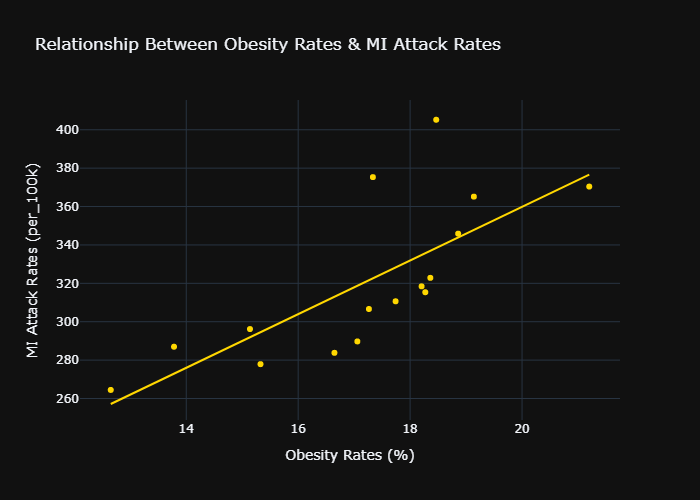

In [64]:
fig = px.scatter(final_df, x='2021_Obese(%)', y='2021_MI(per_100k)', color_discrete_sequence = ['gold'], trendline='ols', 
           title = 'Relationship Between Obesity Rates & MI Attack Rates', 
           labels={'2021_Obese(%)':'Obesity Rates (%)', '2021_MI(per_100k)':'MI Attack Rates (per_100k)'}, template='plotly_dark')

fig.show()
#fig.write_image('OR_VS_MI.png')

* **Scatterplot of Smoking rate vs MI attack rate**

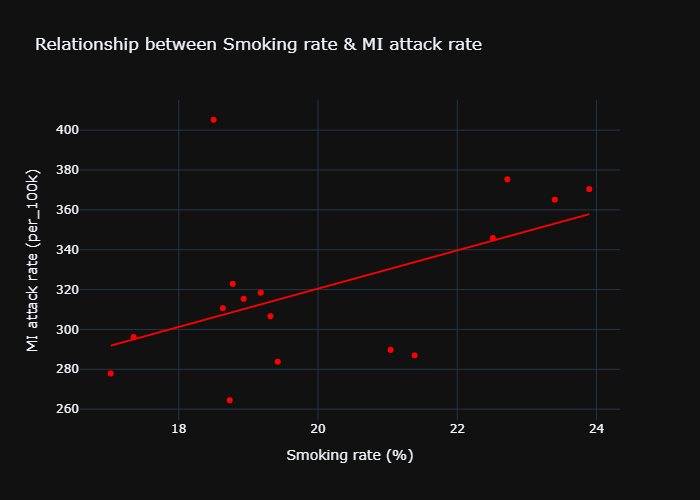

In [65]:
fig = px.scatter(final_df, x='2021_Smoking(%)', y='2021_MI(per_100k)', color_discrete_sequence = ['red'], trendline='ols', 
           title = 'Relationship between Smoking rate & MI attack rate', 
           labels={'2021_Smoking(%)':'Smoking rate (%)', '2021_MI(per_100k)':'MI attack rate (per_100k)'}, template='plotly_dark')
fig.show()
#fig.write_image('SR_VS_MI.png')

* **Heatmap showing the correlation between Smoking, Obesity & MI attack rates**

In [66]:
corr_matrix = final_df[['2021_Smoking(%)', '2021_Obese(%)', '2021_MI(per_100k)']].corr()

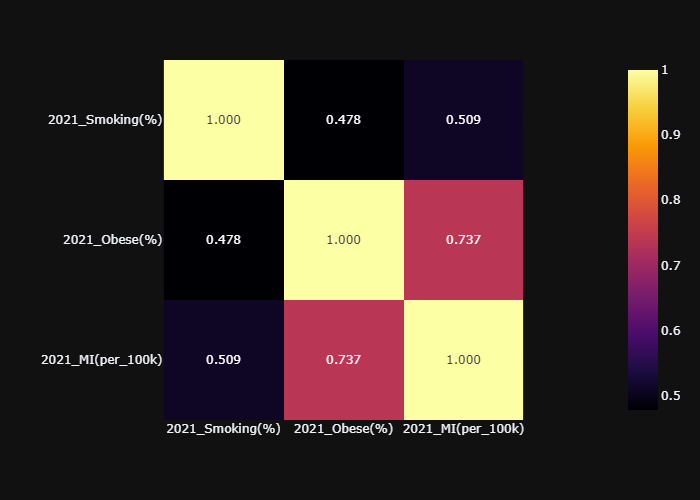

In [67]:
fig = px.imshow(corr_matrix, color_continuous_scale= 'Inferno', template='plotly_dark', text_auto='.3f')
# fig.write_image('corr.png')
fig.show()

* There seems to be a strong linear relationship between being obese and myocardial infarction from the data.
* The relationship between smoking and myocardial infarction is fairly strong.

#### THE BURNING QUESTION:
* *Were there any **statistically significant differences** in MI attack rates based on the proportion of smoking or obese individuals in 2021?*

##### **Linear Regression**

In [68]:
X = final_df[['2021_Obese(%)', '2021_Smoking(%)']]
y = final_df['2021_MI(per_100k)']

pg.linear_regression(X, y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,35.162510,75.002498,0.468818,0.646964,0.575089,0.509718,-126.870535,197.195556
1,2021_Obese(%),12.134620,3.902668,3.109314,0.008297,0.575089,0.509718,3.703418,20.565822
2,2021_Smoking(%),3.833683,3.881984,0.987558,0.341394,0.575089,0.509718,-4.552832,12.220199


### Project Summary

**Key Insights**
* Based on the results of the linear regression analysis and an alpha level of 0.05, it can be deduced that there was a significant association (p=0.0082) between the obesity rate and the prevalence of acute myocardial infarction in Germany in 2021.

* Although smoking is a known risk factor for cardiovascular disease, there was insufficient evidence (p=0.341) to establish a relationship between the smoking rate and the prevalence of myocardial infarction in 2021. This could be as a result of limitations in data collection methods (as reported by the German Federal Statistical Office (*Statistisches Bundesamt*) [here](https://www.destatis.de/EN/Themes/Society-Environment/Population/Households-Families/Methods/microcensus-2020.html#586042)). The inclusion criteria for smoking rate in the study were also broad, encompassing a wide range of participants from occasional to heavy smokers which could have weakened the expected association. 

* An analysis of the overall trends in obesity, smoking and myocardial infarction rates over the past decades revealed a decline in smoking and MI rates while obesity has been on the rise.

**My Recommendations**
    
Mecklenburg Western Pomerania, Bremen and Thuringia performed poorly across nearly all metrics in 2021, highlighting the need for targeted interventions and policies in order to ensure alignment with the Sustainable Development Goals. Based on the analysis, I propose the following recommendations to address key issues identified:

* Improved access to specialised healthcare centres to ensure early detection and prevention of heart diseases.
* Subsidies on healthy, heart-friendly foods.
* Promotion of healthy eating habits and physical activity. 
* Adequate support for those with psychological eating disorders.
* Health promotion campaigns to create increased awareness about the dangers of smoking.
* Higher taxation on tobacco products.
* More stringent rules on advertisements and sale of tobacco products.
* Affordable access to smoke cessation and weight loss programs.

**PACKAGES**

In [69]:
import print_versions
print_versions.print_versions(globals())

pandas==2.2.2
scipy==1.14.0
numpy==2.0.0
json==2.0.9
geopandas==1.0.1
pingouin==0.5.5
PIL==10.4.0
plotly==5.23.0
openpyxl==3.1.5
print_versions==0.1.0


**Data Sources**

[SDG Indicators - Germany](https://www.statistikportal.de/de/nachhaltigkeit/veroeffentlichungen)

[European Community Health Indicators - Acute Myocardial Infarction](https://www.gbe-bund.de/gbe/)

